In [3]:
# ==============================
# Superstore Data Wrangling
# ==============================

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Dataset
df =pd.read_csv('data/Superstore.csv' , encoding='latin-1')


In [6]:
# Preview first rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

In [7]:
# Dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float6

In [8]:
# Check for missing values
print("\nMissing Values per column:")
print(df.isnull().sum())


Missing Values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [10]:
# Rename columns to snake_case
df.columns= df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Convert order_date and ship_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [12]:
# Create a new column 'Profit_Margin'
df['profit_margin'] = np.where(df['sales'] > 0,  df['profit'] / df['sales'] * 100,  np.nan   )

In [13]:
# Filter data for the years 2017 and 2018
df_filtered = df[df['order_date'].dt.year.isin([2017, 2018])]

In [14]:
# Group by Category and calculate total Sales & Profit
category_summary = df.groupby('category').agg({
    "sales" : "sum",
    "profit" : "sum"
    })

# Add a Profit Margin column
category_summary["Profit Margin"] = category_summary["profit"] / category_summary["sales"] * 100    

category_summary.head()


,sales,profit,Profit Margin
category,,,
Furniture,741999.7953,18451.2728,2.486695
Office Supplies,719047.0320,122490.8008,17.035158
Technology,836154.0330,145454.9481,17.395712


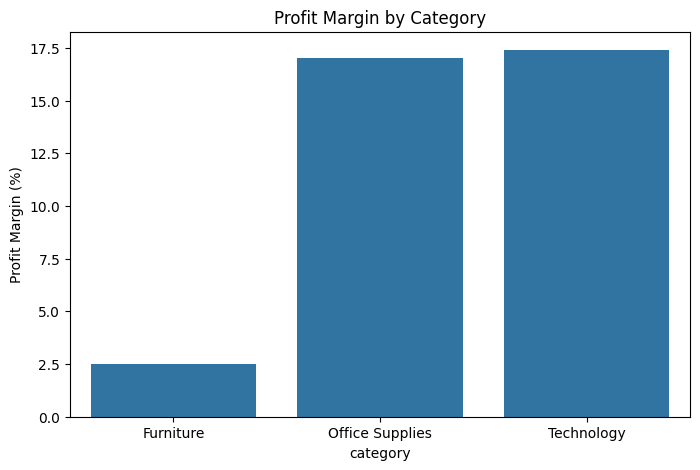

In [15]:
# Visualization #1: Profit Margin by Category
plt.figure(figsize=(8,5))
sns.barplot(x=category_summary.index, y=category_summary["Profit Margin"])
plt.title("Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.show()


In [16]:
# Group by Region and calculate total Profit
region_summary = df.groupby("region").agg({
    "sales": "sum",
    "profit": "sum"
})

# Add a Profit Margin column
region_summary["sales"] = df.groupby("region")["sales"].sum()
region_summary["profit Margin"] = region_summary["profit"] / region_summary["sales"]

region_summary

,sales,profit,profit Margin
region,,,
Central,501239.8908,39706.3625,0.079216
East,678781.2400,91522.7800,0.134834
South,391721.9050,46749.4303,0.119343
West,725457.8245,108418.4489,0.149448


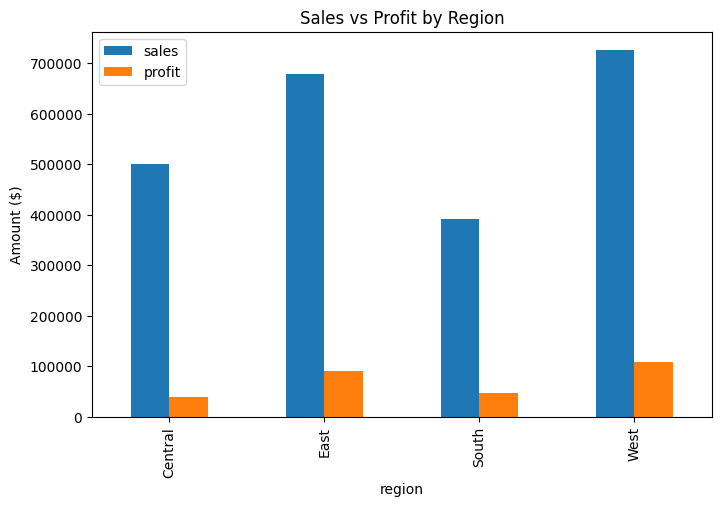

In [20]:
# Visualization #2: Sales vs Profit by Region
region_summary.plot(kind="bar", y=["sales","profit"], figsize=(8,5), title="Sales vs Profit by Region")
plt.ylabel("Amount ($)")
plt.show()


In [17]:
# Group by Sub-Category and sum Sales
subcat_summary = df.groupby("sub-category").agg({
    "sales": "sum"
    })

## Sort descending and take top 5
top5_subcat = subcat_summary.sort_values(by="sales", ascending=False).head(5)
print("\nTop 5 Sub-Categories by Sales:")
print(top5_subcat)


Top 5 Sub-Categories by Sales:
                   sales
sub-category            
Phones        330007.054
Chairs        328449.103
Storage       223843.608
Tables        206965.532
Binders       203412.733


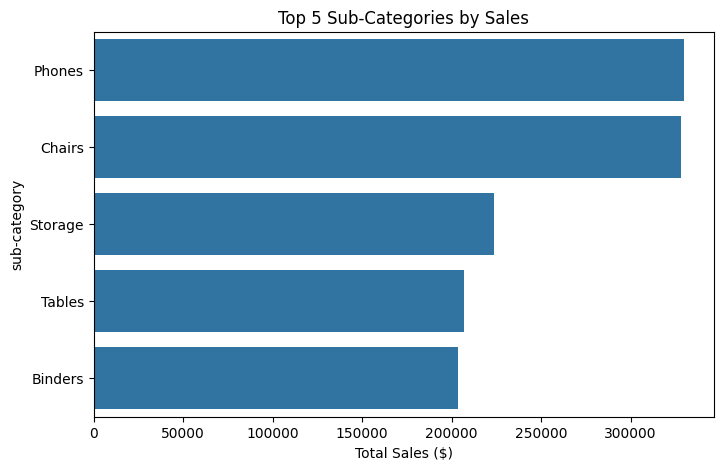

In [ ]:
# Visualization #3: Top 5 Sub-Categories by Sales
plt.figure(figsize=(8,5))
sns.barplot(x="sales", y=top5_subcat.index, data=top5_subcat, orient="h")
plt.title("Top 5 Sub-Categories by Sales")
plt.xlabel("Total Sales ($)")
plt.show()

In [18]:
# Group by product_name and profit

product_summary= df.groupby("product_name").agg({
    "profit": "sum"
})
# Sort descending and take top 10
top10_products= product_summary.sort_values(by="profit", ascending=False).head(10)
print("\ntop 10 profitable products:")
print(top10_products)


top 10 profitable products:
                                                        profit
product_name                                                  
Canon imageCLASS 2200 Advanced Copier               25199.9280
Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.0390
Hewlett Packard LaserJet 3310 Copier                 6983.8836
Canon PC1060 Personal Laser Copier                   4570.9347
HP Designjet T520 Inkjet Large Format Printer -...   4094.9766
Ativa V4110MDD Micro-Cut Shredder                    3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta     3717.9714
Plantronics Savi W720 Multi-Device Wireless Hea...   3696.2820
Ibico EPK-21 Electric Binding System                 3345.2823
Zebra ZM400 Thermal Label Printer                    3343.5360


In [24]:
# Save Cleaned Dataset
df.to_csv('data/cleaned_superstore.csv', index=False)